<a href="https://colab.research.google.com/github/NallelyPintor/Implementing-Principal-Components-Analysis-PCA-in-Supervised-Models/blob/main/Principal_component_analysis_(PCA)_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA  Implementation in supervised models

**Contexto:**

Se realizará la reduccion de dimensiones de características mediante el análisis de componentes principales PCA en modelos supervisados de machine learning como Random Forest y Regresion Logistica en el conjunto de datos de cáncer

In [1]:
# libraries
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
## Carga de datos
cancer = load_breast_cancer()

In [3]:
print(len(cancer.data[cancer.target==1]))

357


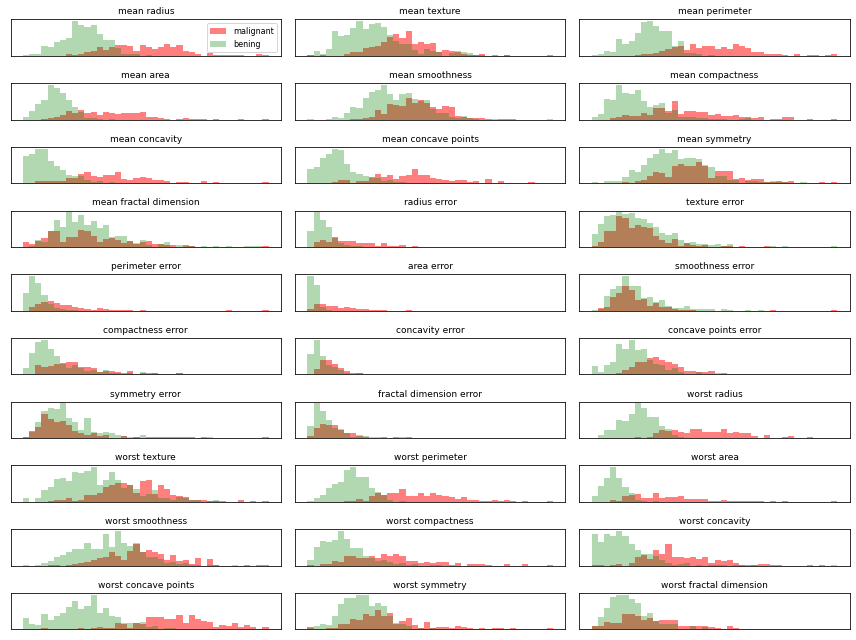

In [ ]:
# Review data before PCA
# Create histograms of malignat and bening clases

fig, axes = plt.subplots(10,3, figsize=(12,9))

malignant= cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

ax=axes.ravel()

for i in range(30):
    _ , bins = np.histogram(cancer.data[:, i], bins = 40)
    ax[i].hist(malignant[:,i],bins=bins,color ='r',alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color ='g',alpha=0.3)
    ax[i].set_title(cancer.feature_names[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False) 
    ax[i].set_yticks(())
    
ax[0].legend(['malignant', 'bening'], loc='best', fontsize=8)
plt.tight_layout()
plt.show()

**Nota:**

Es importante recordar que el PCA es esencialmente un método que reduce la dimensión del espacio de características de tal manera que las nuevas variables son ortogonales entre sí (es decir, son independientes o no están correlacionadas)

In [4]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
X = cancer_df[['mean area','mean radius','mean texture','mean perimeter','mean smoothness','mean compactness','mean concavity'
,'mean concave points','mean symmetry','mean fractal dimension','radius error','texture error','perimeter error','area error','smoothness error','compactness error','concavity error',
'concave points error','symmetry error','fractal dimension error','worst radius','worst texture','worst perimeter','worst area','worst smoothness','worst compactness',
'worst concavity','worst concave points','worst symmetry','worst fractal dimension']]

In [5]:
X.head()

,mean area,mean radius,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1001.0,17.99,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1326.0,20.57,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1203.0,19.69,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,386.1,11.42,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1297.0,20.29,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Clase o salida 0 o 1 
y = cancer.target
# 0:Cáncer Maligno
# 1:Cáncer Beningno


In [7]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

## Modelo Supervisado #1:

In [8]:
#dividir data en train y test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=17)

In [18]:
#RandomForest
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
# modificamos max_depth jugamos con el para encontrar una mejor precisión
rfr = RandomForestClassifier(max_depth=100).fit(X_train, y_train) 
#rfr = RandomForestRegressor(max_depth=100000).fit(X_train, y_train)  

In [19]:
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_test), y_test, squared=False)
#error de entrenamiento y error de test

(0.0, 0.1873171623163388)

In [20]:
pred_rfr= rfr.predict(X_test)
pred_rfr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_rfr))

0.9649122807017544


## Modelo Supervisado #2:

In [12]:
#Regresion Logistica
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=20000).fit(X_train,y_train)

In [13]:
pred_lr = lr.predict(X_test)
pred_lr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1])

Evaluación del modelo

In [14]:
mse(lr.predict(X_train), y_train, squared=False), mse(lr.predict(X_test), y_test, squared=False)
#error de entrenamiento y error de test

(0.1932941731212748, 0.22941573387056177)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_lr))

0.9473684210526315


Elijo el modelo supervisado #1: Random Forest 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_rfr))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        38
           1       0.97      0.97      0.97        76

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [25]:
from sklearn import metrics
cnf_matrix=metrics.confusion_matrix(y_test,pred_rfr)
cnf_matrix

array([[36,  2],
       [ 2, 74]])

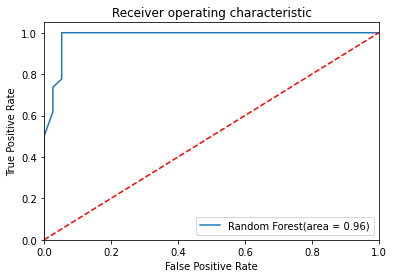

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rfr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Modelo PCA

In [28]:
# Apply method of Standard on dataset

scaler = StandardScaler() #normaliza las variables
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

print('after scaling minimun', X_scaled.min(axis=0))

after scaling minimun [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [29]:
# PCA

pca = PCA(n_components=3)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print('shape of x_pxa:', X_pca.shape)

shape of x_pxa: (569, 3)


In [30]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_pca,y,test_size=0.20,random_state=17)

In [39]:
#Random Forest #2 PCA
from sklearn.linear_model import LogisticRegression
rfr_pca = RandomForestClassifier(max_depth=100).fit(X_train_pca, y_train_pca) 


In [40]:
pred_rfr_pca = rfr_pca.predict(X_test_pca)
pred_rfr_pca

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

Evaluación del modelo

In [41]:
mse(rfr_pca.predict(X_train_pca), y_train_pca, squared=False), mse(rfr_pca.predict(X_test_pca), y_test_pca, squared=False)
#error de entrenamiento y error de test

(0.0, 0.26490647141300877)

In [43]:
print(accuracy_score(y_test_pca,pred_rfr))

0.9649122807017544


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca,pred_rfr_pca))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        38
           1       0.96      0.93      0.95        76

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



In [46]:
matrix_con_pca = metrics.confusion_matrix(y_test_pca,pred_rfr_pca)
matrix_con_pca

array([[35,  3],
       [ 5, 71]])

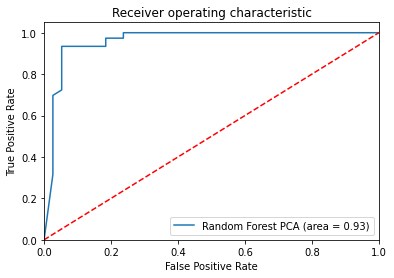

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_pca, rfr_pca.predict(X_test_pca))
fpr, tpr, thresholds = roc_curve(y_test_pca, rfr_pca.predict_proba(X_test_pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest PCA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()